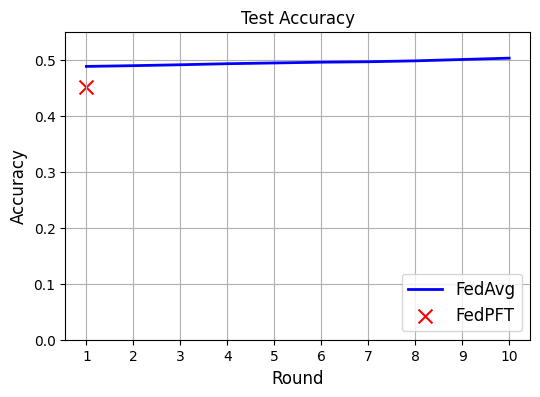

In [42]:
import pickle
import matplotlib.pyplot as plt

def read_accuracies(pkl_path):
    with open(pkl_path, "rb") as handle:
        data = pickle.load(handle)
    return data['history'].metrics_distributed['accuracy']

def save_fig(name, fig):
    fig.savefig(
        name,
        dpi=300,
        facecolor=fig.get_facecolor(),
        edgecolor="none",
        orientation="portrait",
        format="png",
        transparent=False,
        bbox_inches="tight",
        pad_inches=0.2,
        metadata=None,
    )

pft_path = '/Users/chenyufeng/desktop/result/pft.pkl'
avg_path = '/Users/chenyufeng/desktop/result/avg.pkl'

pft = read_accuracies(pft_path)
avg = read_accuracies(avg_path)

def viz():
    fig, ax = plt.subplots(figsize=(6, 4))

    color1 = 'blue'
    color2 = 'red'

    ax.plot([r for r, _ in avg], [a for _, a in avg], label='FedAvg', color=color1, linewidth=2.0)
    ax.scatter([r for r, _ in pft], [a for _, a in pft], label='FedPFT', color=color2, marker='x', s=100)

    ax.set_title('Test Accuracy')
    ax.set_ylim(0, 0.55)
    ax.set_xticks([1, 2,3,4, 5,6,7,8, 9,10])
    ax.grid()
    ax.legend(fontsize=12, loc='lower right')
    ax.set_xlabel("Round", fontsize=12)
    ax.set_ylabel("Accuracy", fontsize=12)

    return fig

fig = viz()
save_fig("fed_comparison.png", fig)
plt.show()
